In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings("ignore")

# We will use some methods from the sklearn module
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
df = pd.read_csv("/content/drive/MyDrive/mllabpg/lab6/data(1).csv")

In [5]:
df.head()

,,Model,Volume,Weight,CO2
0,Toyoty,Aygo,1000,790,99
1,Mitsubishi,Space Star,1200,1160,95
2,Skoda,Citigo,1000,929,95
3,Fiat,500,900,865,90
4,Mini,Cooper,1500,1140,105


In [ ]:
df.shape

(36, 5)

          Volume    Weight       CO2
Volume  1.000000  0.753537  0.592082
Weight  0.753537  1.000000  0.552150
CO2     0.592082  0.552150  1.000000


<Axes: >

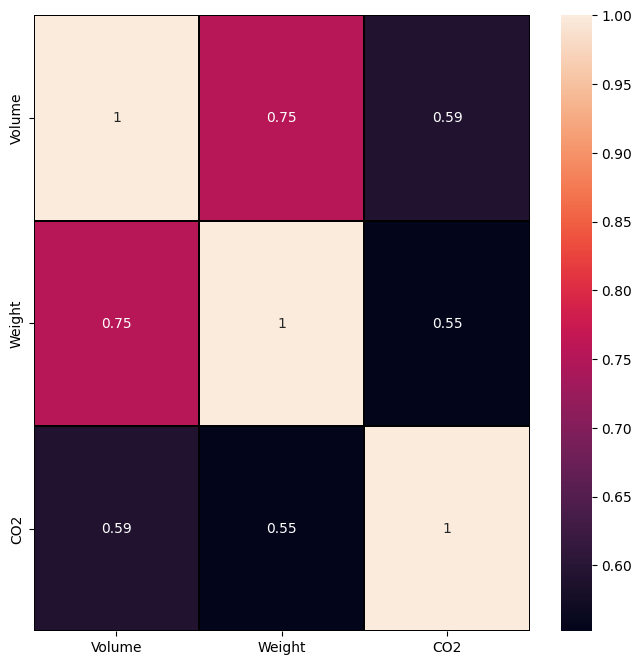

In [23]:
print(df.corr())
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(df.corr(),annot = True,linecolor ='black', linewidths = .3)

In [ ]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [6]:
X = df[['Weight', 'Volume']]
y = df['CO2']

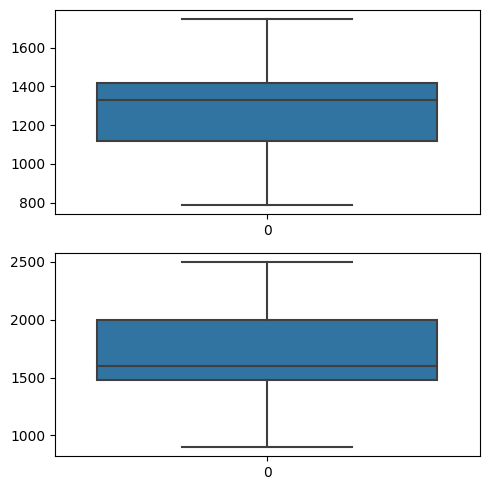

In [7]:
fig, axs = plt.subplots(2, figsize = (5,5))
plt1 = sns.boxplot(df['Weight'], ax = axs[0])
plt2 = sns.boxplot(df['Volume'], ax = axs[1])
plt.tight_layout()

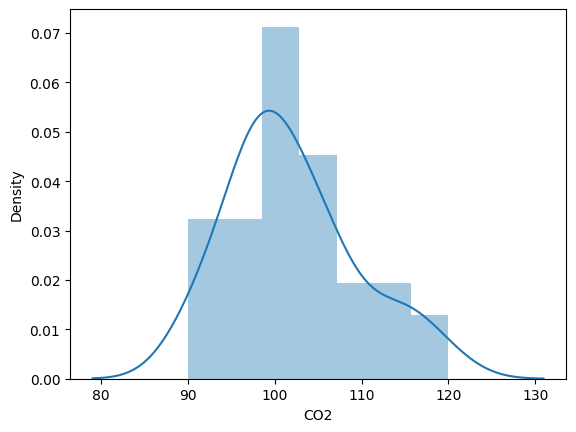

In [8]:
sns.distplot(df['CO2']);

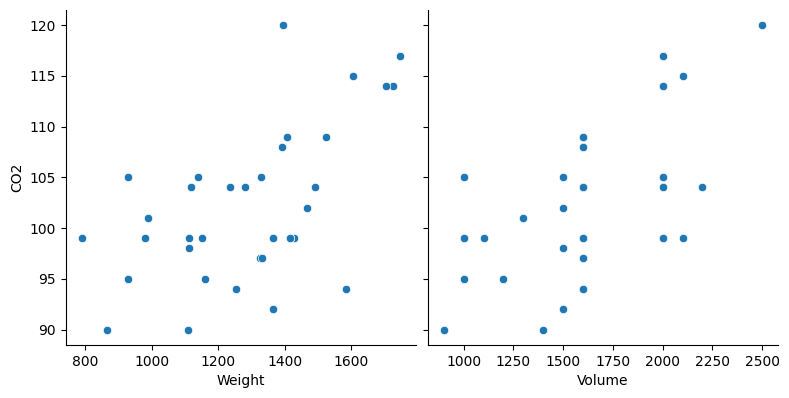

In [9]:
sns.pairplot(df, x_vars=['Weight', 'Volume'], y_vars='CO2', height=4, aspect=1, kind='scatter')
plt.show()

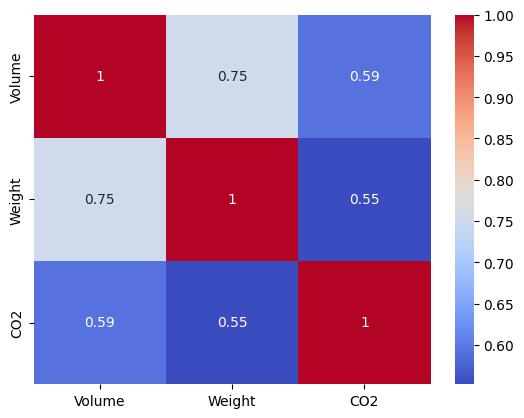

In [10]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

In [11]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [12]:
y_train.shape

(25,)

In [ ]:
y_test.shape

(11,)

In [13]:
reg_model = linear_model.LinearRegression()

In [14]:
reg_model = LinearRegression().fit(X_train, y_train)

In [15]:
print('Intercept: ',reg_model.intercept_)
# pair the feature names with the coefficients
list(zip(X, reg_model.coef_))

Intercept:  74.33882836589245


[('Weight', 0.0171800645996374), ('Volume', 0.0025046399866402976)]

In [32]:
y_pred= reg_model.predict(X_test)  
x_pred= reg_model.predict(X_train)
print(f"Train accuracy {round(reg_model.score(X_train,y_train)*100,2)} %")

Train accuracy 44.93 %


In [17]:
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [ 90.41571939 102.16323413  99.56363213 104.56661845 101.54657652
  95.94770019 108.64011848 102.22654214  92.80374837  97.27327129
  97.57074463]


In [18]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
reg_model_diff

,Actual value,Predicted value
0,99,90.415719
19,105,102.163234
32,104,99.563632
35,120,104.566618
7,92,101.546577
12,99,95.947700
29,114,108.640118
33,108,102.226542
5,105,92.803748
1,95,97.273271


In [19]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Mean Absolute Error:', mae)
print('Root Mean Square Error:', r2)

Mean Absolute Error: 6.901980901636316
Mean Square Error: 63.39765310998794
Root Mean Square Error: 7.96226432053018
